## IMDB Reviews

##  Classification of movie reviews : A binary classification example

Create a neural network to classify reviews from the IMDB movie reviews dataset into two categories, or binary classification, to determine whether they are good or bad. To conduct the categorization, we will use the Python library Keras.

 Problem Statement

 Find the probability of the review being a positive or negative using deep neural networks.

About the dataset

The Internet Movie Database's IMDB dataset has 50,000 extremely polarized reviews. For training and testing, they are divided into 25000 reviews apiece. Each set comprises an equivalent number of favorable and negative evaluations(50 percent).

Keras is included with the IMDB dataset. It is made up of reviews and the labels that go with them (0 for negative and 1 for positive review). The reviews consist of a series of words. They are preprocessed as a series of integers, with each integer representing a different word from the dictionary.


Loading the IMDB dataset

In [1]:
# importing libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

Divide the dataset into training and test sets.


Load the data, keeping only 10,000 of the most frequently occuring words


In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Printing the first review from the training data

In [3]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
# Check the first label

train_labels[0]

1

In [5]:
# Only 10000 frequent words are considered and therefore the word index should not exceed the frequent word count.

# Find the maximum of all the maximum indexes
max([max(sequence) for sequence in train_data])

9999

Decoding movie reviews back to text

In [6]:
# Let's decode the review

# step 1: Load the mappings of the dictionary from the word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to integer mapping 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# step 3: Decode the review, mapping integer to words
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
len(reverse_word_index)

88584

Preparing the data

**Vectorizing the data**

Our deep convolutional neural network cannot be given a list of integers. We'll have had to turn them into tensors.

To prepare our data, we'll utilize One-hot Encoding to convert our lists into vectors of 0s and 1s. Everyone of our sequences would be blown up into 10,000-dimensional vectors with 1 at all indexes correlating all integers in the sequence. All indices that are not in integer sequence will also have the element 0 in this vector.

Simply explained, each review will be represented by a 10,000-dimensional vector.

Each index corresponds to a single word.
Every index with the value 1 represents a word in the review that is designated by its integer counterpart.
Every index that starts with 0 is a word.



In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))                   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1                                 
    return results

# Vectorizing the train data
x_train = vectorize_sequences(train_data)
# Vectorizing the test data
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
x_train.shape

(25000, 10000)

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Building the model**

Our input dataset consisted of vectors which must be converted to encoder labels (0s and 1s). This is one of the simplest setups, and a basic stack of fully connected Dense layers with relu activation operates well.

**Hidden Layers**

We'll use hidden layers in this network. As a response, we'll classify our layers.

Dense(16, activation='relu')
The number of hidden units of a layer is the argument supplied to each Dense layer (16).

After a series of tensor operations, the output of a Dense layer with relu activation is generated. This process is carried out in the following manner:

output = relu(dot(W, input) + b)
W is the weight matrix, while b denotes the bias (tensor).

The matrix W will have the shape (_inputDimension, 16) if there are 16 hidden units. In this scenario, the input vector's dimension is 10,000, and the Weight matrix's structure is (10000, 16). This network would have 16 neurons if represented as a graph.

**Architecture of the Model**

For our model, we will be using the

1. Two layers which are intermediate with each having 16 hidden layers uses relu activation function which is used in zeroing the negative values.

2. Third layer will be the output layer which uses a sigmoid activation.

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In the compilation step, we will observe optimizer, loss function and metrics.

Here, we will use the following functions
* binary_crossentropy loss function which is used for binary classification.
* optimizer used is rmsprop.
* the measure of performance is accuracy

the above functions can be used to the compile the model as all the rmsprop, binary_crossentropy and accuracy comes in package with keras.

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [13]:

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Setting aside a validation set**

We'll set aside a few of our training data for validation of the model's correctness as it improves. A validation set allows companies to monitor the progress of our model as it advances through epochs during training on previously unseen data.

Validation steps allow us to fine-tune the model's training parameters.

fit function to prevent data overfitting and underfitting.

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In the start, we'll train our models in 512-sample mini-batches for 20 epochs. The fit method will also take our validation set.

The fit function will return a History object when called. This object has a member history that includes all information about the training process, including the values of observable or monitored quantities as the epochs progress. 
This item will be saved so that we can better decide the fine tuning that will be done to the training step.

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 68ms/step - loss: 0.5396 - accuracy: 0.7715 - val_loss: 0.4165 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3323 - accuracy: 0.8993 - val_loss: 0.3317 - val_accuracy: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2426 - accuracy: 0.9252 - val_loss: 0.2924 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1892 - accuracy: 0.9409 - val_loss: 0.2927 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1535 - accuracy: 0.9524 - val_loss: 0.3031 - val_accuracy: 0.8808
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1253 - accuracy: 0.9625 - val_loss: 0.2884 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1065 - accuracy: 0.9692 - val_loss: 0.3238 - val_accuracy: 0.8787
Epoch 8/20
30

By the end of the training, we have attained a training accuracy of 99.99% and validation accuracy of 86.80%.

The performance metrics of the network is observed and is stored in the history object.

by calling the fit method returns a history object. This object has an attribute which is a dictionary which contains four entries.

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history_dict consists of 
* Training loss
* Training Accuracy
* Validation Loss
* Validation Accuracy

We are using Matplotlib to plot the loss and accuracy of both Training and Validation side by side.

**Plotting the training and validation loss**

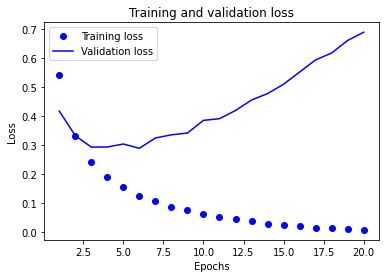

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]             # Plotting the losses
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Validation loss started increasing from 3rd epoch. So the remodelling is done using 3rd and 4th epochs.

**Plotting the  training and validation accuracy**

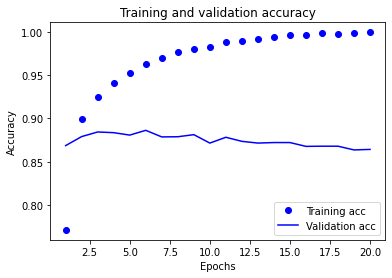

In [18]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]                     # Plotting the accuracy
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From the above plots, we observed that minimum validation loss and maximum validation accuracy is observed at 3 to 5 epochs.  After that we observe two trends.
* validation loss increase and training loss in decrease.
* validation accuracy decrease and training accuracy increase.

The above implications implies that the model is getting better at classifying the training data, it makes consistent worse predictions when it encounters new and unseen data which is overfitting. After 5th epoch the model begins to fit too closely to the training data.

To address the overfitting, the number of epoch is reduced to somewhere between 3 and 5 epochs. The epochs may vary depending on the machine and due the nature of weights that are randomly assigned.

**Retraining our model**

four epochs are used in retraining the model

In [19]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=512)     
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 34ms/step - loss: 0.4556 - accuracy: 0.8220
Epoch 2/3
49/49 [==============================] - 1s 30ms/step - loss: 0.2633 - accuracy: 0.9069
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2812 - accuracy: 0.8882


In [20]:
results

[0.2811729609966278, 0.888159990310669]

 **1.  You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.**   

In [21]:
# model is built using three hidden layers with relu activation function
model_13 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# # model is built using one hidden layer with relu activation function
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [22]:
#using RMSProp and binary cross entropy for both the three and one hidden layers.
model_13.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [23]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history_13 = model_13.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_11 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5559 - accuracy: 0.7432 - val_loss: 0.4204 - val_accuracy: 0.8543
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3290 - accuracy: 0.8987 - val_loss: 0.3217 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2299 - accuracy: 0.9269 - val_loss: 0.2852 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1812 - accuracy: 0.9391 - val_loss: 0.2915 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1440 - accuracy: 0.9530 - val_loss: 0.3033 - val_accuracy: 0.8796
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1146 - accuracy: 0.9645 - val_loss: 0.3724 - val_accuracy: 0.8647
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0917 - accuracy: 0.9737 - val_loss: 0.3188 - val_accuracy: 0.8824
Epoch 8/20
30

Plotting training and validation loss

In [24]:
historyp_13 = history_13.history
historyp_13.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
historyp_11 = history_11.history
historyp_11.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting training and testing loss

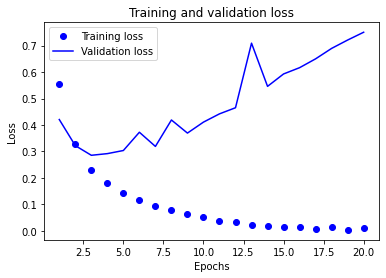

In [26]:

historyp_13 = history_13.history
loss_values3 = historyp_13["loss"]
val_loss_values3 = historyp_13["val_loss"]            #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed at 5th epoch

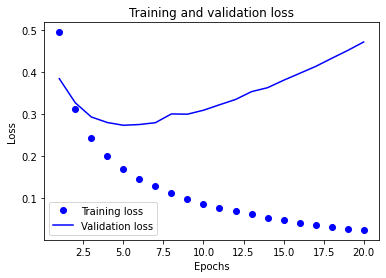

In [27]:
historyp_11 = history_11.history
loss_values1 = historyp_11["loss"]
val_loss_values1 = historyp_11["val_loss"]           #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed at 5th epoch

Plotting training and testing accuracy

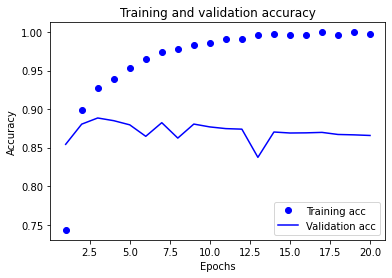

In [28]:
plt.clf()
acc3 = historyp_13["accuracy"]
val_acc3 = historyp_13["val_accuracy"]           #plotting the accuracy 
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum validation accuracy is observed at 5th epoch

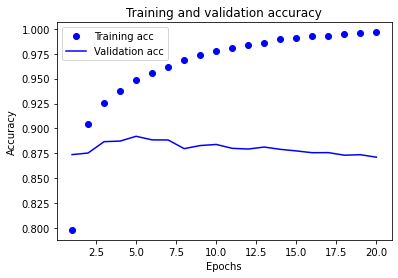

In [29]:
plt.clf()
acc1 = historyp_11["accuracy"]
val_acc1 = historyp_11["val_accuracy"]          #plotting the accuracy
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum vallidation accuracy is observed at 5th epoch.

 **2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.**   





In [30]:
#model is built using 2 hidden layers with 32 and 64 nodes.
model_2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [31]:
#using RMSProp and binary cross entropy 
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [32]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.4865 - accuracy: 0.7809 - val_loss: 0.3455 - val_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2714 - accuracy: 0.9046 - val_loss: 0.2855 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1963 - accuracy: 0.9308 - val_loss: 0.2744 - val_accuracy: 0.8923
Epoch 4/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1642 - accuracy: 0.9408 - val_loss: 0.3017 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1128 - accuracy: 0.9631 - val_loss: 0.3386 - val_accuracy: 0.8745
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0938 - accuracy: 0.9693 - val_loss: 0.3465 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0745 - accuracy: 0.9763 - val_loss: 0.3597 - val_accuracy: 0.8814
Epoch 8/20
30

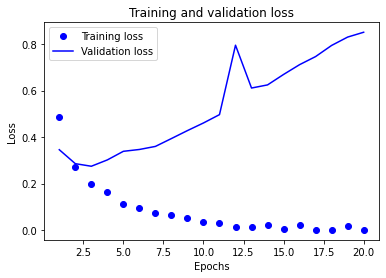

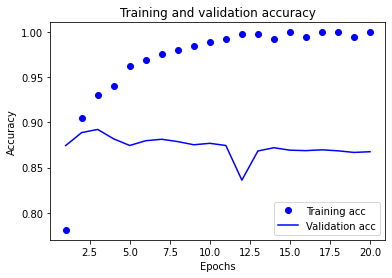

In [33]:
historyp2 = history2.history
loss_values = historyp2["loss"]
val_loss_values = historyp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp2["accuracy"]
val_acc = historyp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The minimum validation loss is observed at 3rd epoch and maximum validation accuracy is observed at 3rd and 4th epochs.

**3. Try using the mse loss function instead of binary_crossentropy.** 

In [34]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [35]:
#using RMSProp and mse loss function 
model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [36]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.1844 - accuracy: 0.7741 - val_loss: 0.1325 - val_accuracy: 0.8514
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1006 - accuracy: 0.8983 - val_loss: 0.0986 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0688 - accuracy: 0.9281 - val_loss: 0.0966 - val_accuracy: 0.8738
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0527 - accuracy: 0.9441 - val_loss: 0.0851 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0430 - accuracy: 0.9547 - val_loss: 0.0831 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0328 - accuracy: 0.9668 - val_loss: 0.0916 - val_accuracy: 0.8750
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0276 - accuracy: 0.9727 - val_loss: 0.0859 - val_accuracy: 0.8820
Epoch 8/20
30

**Plotting training and testing loss**

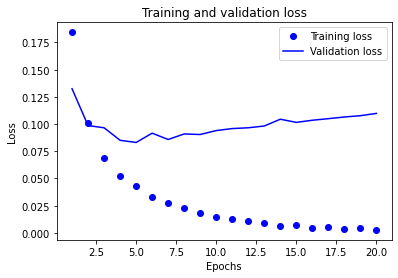

In [37]:
historyp3 = history3.history
loss_values = historyp3["loss"]
val_loss_values = historyp3["val_loss"]             #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed in 3rd epoch.

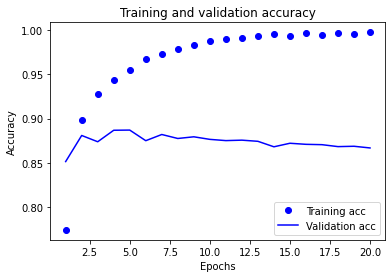

In [38]:
plt.clf()
acc = historyp3["accuracy"]
val_acc = historyp3["val_accuracy"]            #plotting the accuracy plots
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum accuracy is observed in 2nd and 3rd epochs.

**4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.**

In [39]:
#model is built using tanh activation function.
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [40]:
#using RMSProp and binary cross entropy 
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [41]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1590 - accuracy: 0.7873 - val_loss: 0.1078 - val_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0803 - accuracy: 0.9069 - val_loss: 0.0880 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0571 - accuracy: 0.9334 - val_loss: 0.0864 - val_accuracy: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0417 - accuracy: 0.9518 - val_loss: 0.0839 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0321 - accuracy: 0.9628 - val_loss: 0.0865 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0246 - accuracy: 0.9723 - val_loss: 0.0917 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0211 - accuracy: 0.9763 - val_loss: 0.0952 - val_accuracy: 0.8790
Epoch 8/20
30

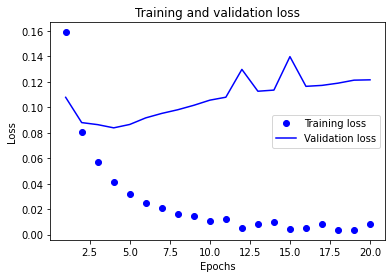

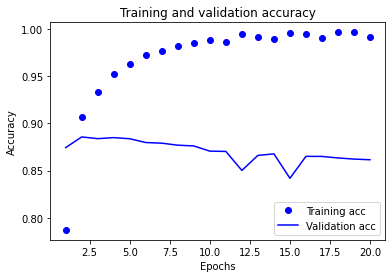

In [42]:
historyp4 = history4.history
loss_values = historyp4["loss"]
val_loss_values = historyp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp4["accuracy"]
val_acc = historyp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Here, the minimum validation loss is observed in 3rd epoch and maximum validation accuracy is observed in 3rd epoch.

In [43]:
results

[0.2811729609966278, 0.888159990310669]

**5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.**

In [44]:
model_5 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [45]:
#using RMSProp and binary cross entropy 
model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [46]:
# Here the fitting of the model is done by taking 20 epochs with batch size of 512.
history5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5088 - accuracy: 0.7677 - val_loss: 0.3873 - val_accuracy: 0.8377
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2863 - accuracy: 0.8954 - val_loss: 0.2798 - val_accuracy: 0.8914
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2072 - accuracy: 0.9245 - val_loss: 0.2754 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1646 - accuracy: 0.9396 - val_loss: 0.2909 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1281 - accuracy: 0.9559 - val_loss: 0.3492 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1019 - accuracy: 0.9639 - val_loss: 0.3271 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0798 - accuracy: 0.9725 - val_loss: 0.3560 - val_accuracy: 0.8813
Epoch 8/20
30

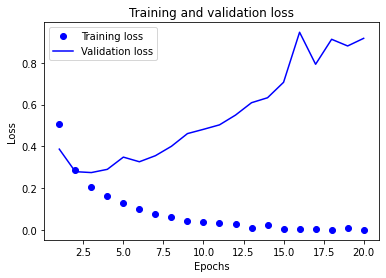

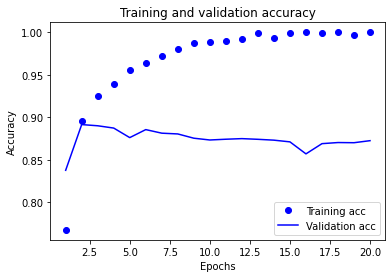

In [47]:
historyp5 = history5.history
loss_values = historyp5["loss"]
val_loss_values = historyp5["val_loss"]        #plotting the losses
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp5["accuracy"]    
val_acc = historyp5["val_accuracy"]            #plotting the accuracy plots
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the minimum validation loss is observed in 3rd epoch and maximum validation accuracy is observed in 3rd epoch.

In [48]:
results

[0.2811729609966278, 0.888159990310669]